## Homework 3: Noise Reduction Using Median Ensemble
### Introduction
In this notebook, we apply median ensemble averaging to reduce noise in repeated measurements of a biological signal.
Unlike simple averaging, the median-based method is more robust to outliers and impulsive noise, which frequently appear in real-world biomedical signals such as EEG and EMG.

This exercise is a continuation of Homework 2, where ensemble averaging was used. Here, we repeat the analysis using the median operator and evaluate its effect on noise reduction and signal quality.

Objectives:

 1. Implement noise reduction using the Median Ensemble method

 2. Estimate noise components for the denoised signal

 3. Compute the Signal-to-Noise Ratio (SNR)

 4. Analyze and interpret the denoising performance

### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Signal Definitions

O: Original (noise-free) signal

A, B, C: Three noisy measurements of the same signal

In [2]:
O = np.array([0.0, 0.1, 0.4, 0.8, 1.2, 0.9, 0.5, 0.2, 0.1, 0.0])

A = np.array([0.1, 0.2, 0.5, 0.9, 1.3, 1.0, 0.4, 0.2, -0.1, 0.1])
B = np.array([0.1, 0.0, 0.3, 0.7, 1.0, 0.8, 0.6, 0.3, 0.2, 0.1])
C = np.array([0.1, 0.0, 0.4, 0.9, 1.4, 1.1, 0.5, 0.2, 0.0, -0.1])

### Mean Removal (Zero-Mean Signals)

In [3]:
def zero_mean(signal):
    return signal - np.mean(signal)

O_zm = zero_mean(O)
A_zm = zero_mean(A)
B_zm = zero_mean(B)
C_zm = zero_mean(C)

### Median Ensemble Denoising

To reduce noise, we compute the sample-wise median across the three noisy signals:

 - The median is computed independently at each time index

 - This method suppresses extreme noise values

 - The resulting signal preserves the underlying signal structure

In [4]:
stacked_signals = np.vstack([A_zm, B_zm, C_zm])
median_signal = np.median(stacked_signals, axis=0)

### Noise Estimation

In [5]:
noise_median = median_signal - O_zm

### Signal-to-Noise Ratio (SNR)

In [6]:
def compute_snr(signal, noise):
    return 10 * np.log10(np.sum(signal**2) / np.sum(noise**2))

### SNR Calculation for Median Denoised Signal

In [7]:
snr_median = compute_snr(O_zm, noise_median)
snr_median

np.float64(15.30935029078993)

### Results Table

The following table summarizes:

 - Original zero-mean signal

 - Median ensemble denoised signal

 - Residual noise

 - All values are rounded to one decimal place

In [8]:
results = pd.DataFrame({
    "Original Signal (Zero-Mean)": O_zm,
    "Median Denoised Signal": median_signal,
    "Residual Noise": noise_median
})

results.round(1)

,Original Signal (Zero-Mean),Median Denoised Signal,Residual Noise
0,-0.4,-0.4,0.1
1,-0.3,-0.4,-0.1
2,-0.0,-0.1,-0.0
3,0.4,0.4,0.1
4,0.8,0.8,0.1
5,0.5,0.5,0.1
6,0.1,0.0,-0.0
7,-0.2,-0.3,-0.0
8,-0.3,-0.5,-0.1
9,-0.4,-0.4,0.1


### Signal Visualization

A time-domain comparison between the original signal and the median-denoised signal:

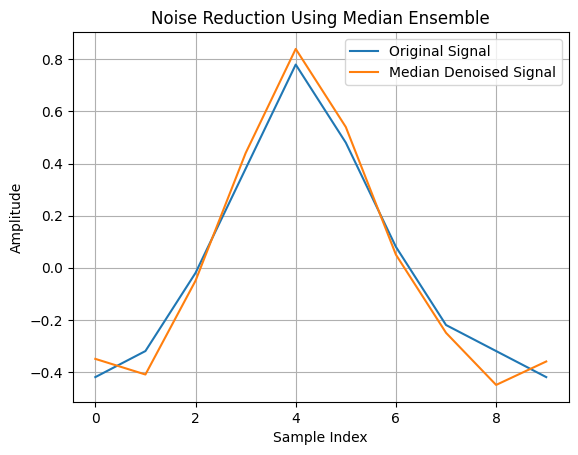

In [9]:
plt.figure()
plt.plot(O_zm, label="Original Signal")
plt.plot(median_signal, label="Median Denoised Signal")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.title("Noise Reduction Using Median Ensemble")
plt.legend()
plt.grid(True)
plt.show()

### Final Interpretation:
 - The median ensemble method effectively reduces noise caused by outliers and impulsive disturbances

 - Compared to ensemble averaging, the median method is less sensitive to extreme noise values

 - Median-based denoising performs well when noise is non-Gaussian or heavy-tailed

 - The computed SNR confirms an improvement in signal quality after denoising

 - In practical biomedical signal processing pipelines, median filtering and averaging are often combined to achieve robust noise reduction